# Funciones de correlación
Comenzamos importando las siguientes paqueterias

In [559]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from functools import partial
from collections import Counter
import random
import seaborn as sns
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter 
import pandas as pd

## Construcción de las circunferencias
Como queremos graficar puntos aleatorios de un círculo, primero debemos recordar como se grafica una circunferencia y recordemos que sólo queremos  elegir algunos puntos aleatorios de la circunferencia, y lo hacemos de la siguiente forma:

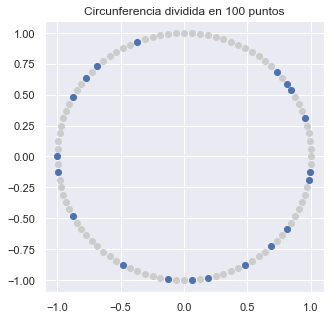

In [560]:
randProba = lambda a: a/sum(a)
npoints = 100# puntos en los que se dividirá cada círculo
r = 1 # radio del círculo

#Graficamos circunferencia gris
plt.figure(figsize=(5,5))
t = np.linspace(0, 2*np.pi, npoints, endpoint=False)
x = r * np.cos(t)
y = r * np.sin(t)
plt.scatter(x, y, c='0.8')

#Graficamos puntos aleatorios de la circunferencia
n = 20 # puntos aleatorios que elegiremos del círculo
t = np.linspace(0, 2*np.pi, npoints, endpoint=False)[np.random.choice(range(npoints), n, replace=False, p=randProba(np.random.random(npoints)))]
x = r * np.cos(t)
y = r * np.sin(t)
plt.title('Circunferencia dividida en 100 puntos')
plt.scatter(x, y)

### Le agregamos perturbaciones 

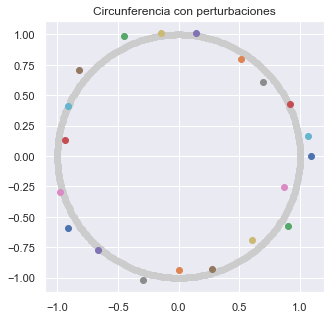

In [561]:
randProba = lambda a: a/sum(a)
npoints = 360 # puntos en los que se dividirá cada círculo
r = 1 # radio del círculo

plt.figure(figsize=(5,5))
t = np.linspace(0, 2*np.pi, npoints, endpoint=False) 
x = (r * np.cos(t))
y = r * np.sin(t)
plt.scatter(x, y, c='0.8')

n = 20 # number of points to chose
puntos = np.linspace(0, 2*np.pi, npoints, endpoint=False)[np.random.choice(range(npoints), n, replace=False)]
for t in range(len(puntos)):
    R = r + random.uniform(-r*0.1,r*0.1)
    x = R * np.cos(t)
    y = R * np.sin(t)
    plt.title('Circunferencia con perturbaciones')
    plt.scatter(x, y)

## Puntos en diferentes círculos aleatorios
A continuación programamos una función a la cual le entregamos los siguientes datos: cantidad de circulos, puntos en los que dividiremos cada círculo, canidad de esos puntos que eligiremos de cada círculo, radio de los círculos, y rango de los centros. A partir de estos datos, nos entrega una 2 listas que son las coordenadas x, y las coordenadas y de cada punto que sigue la distribución de pertenecer a algún circulo con una perturbación del 10% del radio.

In [562]:
# Elegimos cajas cuadradas entre [0, R]
def Puntos_circulos(ncentros, ncircle_points, radio, tcaja,p):
    #Definimos dos arreglos de ceros en los que guardaremos en uno las coordenadas x y en otro las y de los puntos que aleatorios de nuestros círculos
    ran_centros = np.random.rand(ncentros, 2)*tcaja
    x_1, y_1 = ran_centros.T[0], ran_centros.T[1] 
    pts = 0
    circulo = []
    for i in range(ncentros):
        cx = []
        cy = []
        ran_pcircles = np.random.uniform(0, 2*np.pi, ncircle_points)
        for j in ran_pcircles:
            r = radio + random.uniform(-radio*p,radio*p) #Pertubación
            c_1 = x_1[i] + r*np.cos(j)
            c_2 = y_1[i] + r*np.sin(j)
            #Como los centros de los círculos pueden estar en la orilla, 
            #muchos puntos del cículo deseado se pueden salir de área a estudiar deseada, 
            #por lo que sólo guardamos los que quedan dentro
            if (0 < c_1 < tcaja) & (0 < c_2 < tcaja):
                cx.append(c_1)
                cy.append(c_2)
                pts+= 1
        #Agregamos puntos en el centro de los círculos con distribución gaussiana
        x = []
        y = []
        x = np.random.normal(x_1[i], 0.5, int(ncircle_points*0.5))
        y = np.random.normal(y_1[i], 0.5, int(ncircle_points*0.5))
        for k in range(int(ncircle_points*0.3)):
            if (0 < x[k] < tcaja) & (0 < y[k] < tcaja):
                cx.append(x[k])
                cy.append(y[k])
                pts+= 1
        # en caso de querer graficar un circulo en particular 
        circulo.append(list(zip(cx, cy)) )
    print('total puntos', pts)
    return circulo

In [563]:
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo = Puntos_circulos(150, 20, 15, 100,0.01)

total puntos 3339


In [568]:
#df = pd.DataFrame(circulo)
#df

# Archivo txt
#numpy_array = df.to_numpy()
#np.savetxt("circulos_file.txt", numpy_array,fmt = "%s")

#export DataFrame to CSV file
#df.to_csv('circulo_data.csv')

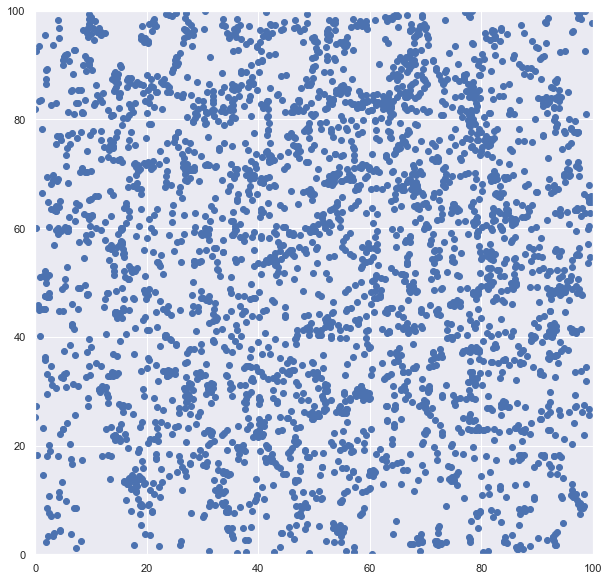

In [565]:
plt.figure(figsize=(10,10))
plt.xlim(0, 100)
plt.ylim(0, 100)

#graficar todos
for cir in circulo: 
    plt.scatter(*zip(*cir), color='b')
    
#graficar un solo circulos
#plt.scatter(*zip(*circulo[4]), color='r')
#plt.scatter(*zip(*circulo[2]), color='r')

In [566]:
def DD(circulo):
    # Save them all in one array
    all_data = []
    for i, c in enumerate(circulo):
        for _, j in enumerate(c):
            all_data.append(j)
    return all_data

In [569]:
N = len(DD(circulo))
df = pd.DataFrame(DD(circulo))

## Distribución aleatoria (RR)

In [570]:
rr = np.random.rand(int(len(DD(circulo))*0.75), 2)*100

In [571]:
Nr = len(rr)

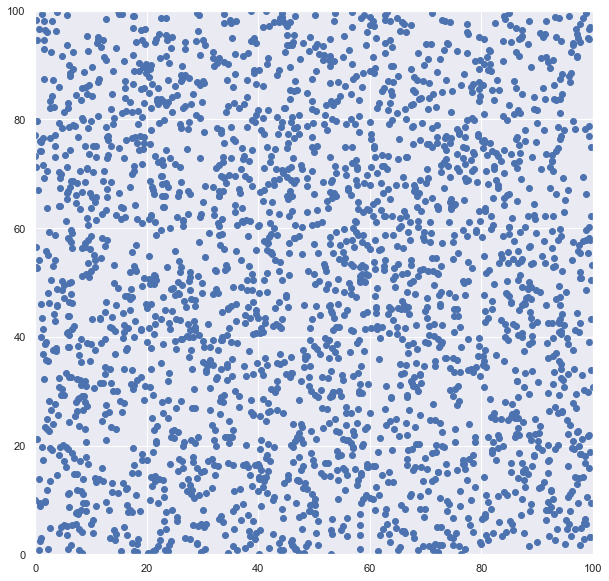

In [572]:
plt.figure(figsize=(10,10))
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.scatter(rr.T[0], rr.T[1], color='b')

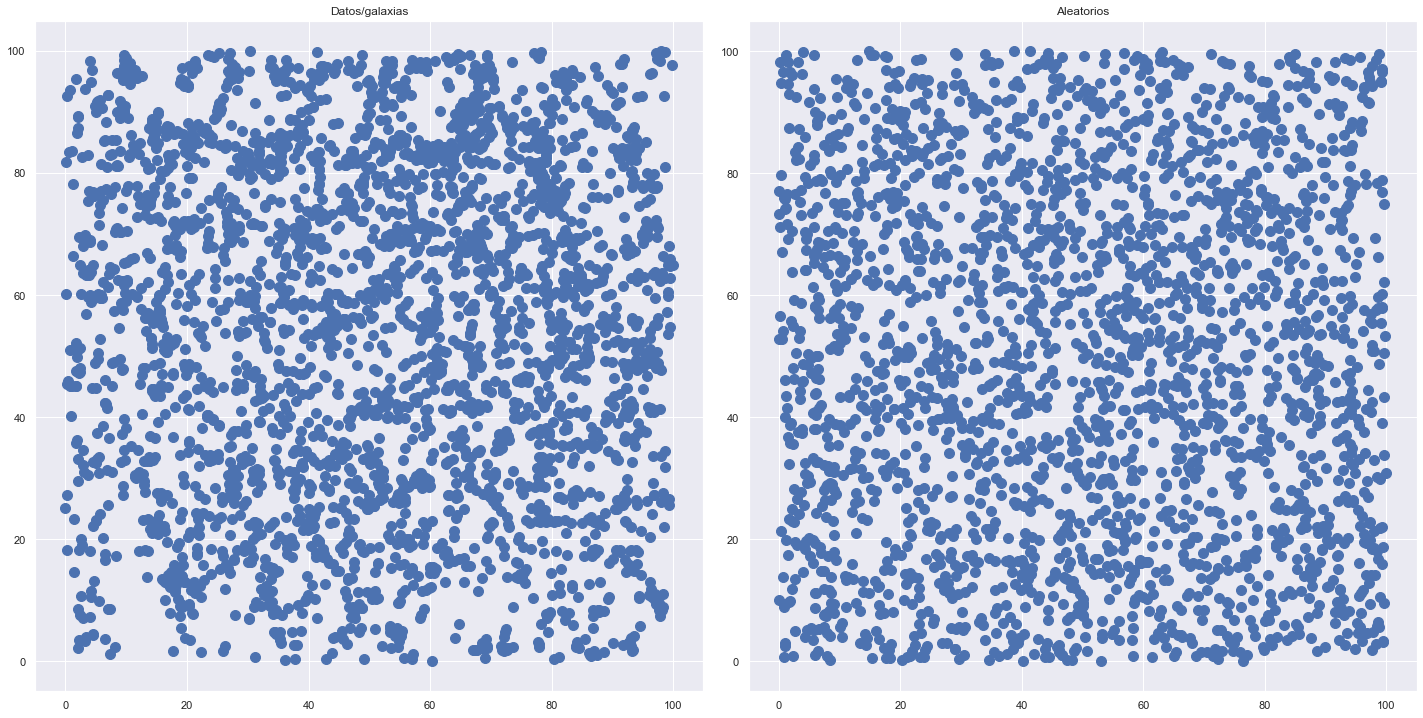

In [573]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(20,10), nrows=1, ncols=2)
plt.tight_layout()

axes_cosmo[0].set_title('Datos/galaxias')
for cir in circulo: 
    axes_cosmo[0].scatter(*zip(*cir), color='b', s=100)

axes_cosmo[1].set_title('Aleatorios')
axes_cosmo[1].scatter(rr.T[0], rr.T[1], color='b', s=100)

In [574]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([df[0], df[1]]))
xi, yi = np.mgrid[df[0].min():df[0].max():df[0].size**0.5*1j,df[1].min():df[1].max():df[1].size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

<ipython-input-576-ee3aecb616bc>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax1.pcolormesh(xi, yi, zi.reshape(xi.shape), alpha=0.5)


FileNotFoundError: [Errno 2] No such file or directory: 'soccerPitch.jpg'

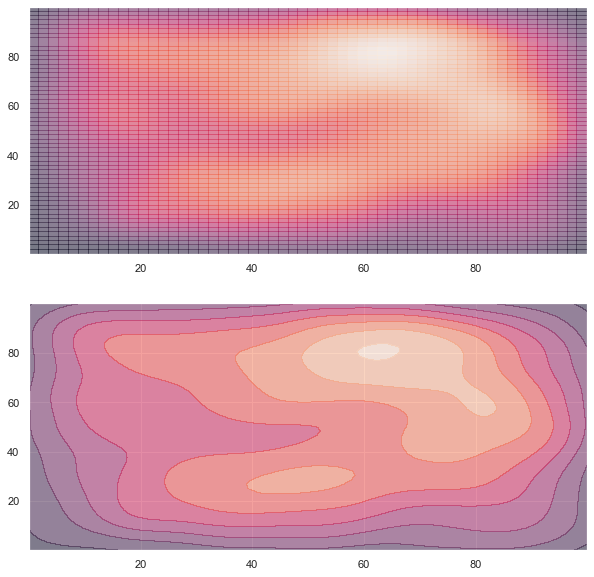

In [576]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# alpha=0.5 will make the plots semitransparent
ax1.pcolormesh(xi, yi, zi.reshape(xi.shape), alpha=0.5)
ax2.contourf(xi, yi, zi.reshape(xi.shape), alpha=0.5)

ax1.set_xlim(df[0].min(), df[0].max())
ax1.set_ylim(df[1].min(), df[1].max())
ax2.set_xlim(df[0].min(), df[0].max())
ax2.set_ylim(df[1].min(), df[1].max())

# you can also overlay your soccer field
im = plt.imread('soccerPitch.jpg')
ax1.imshow(im, extent=[df[0].min(), df[0].max(), df[1].min(), df[1].max()], aspect='auto')
ax2.imshow(im, extent=[df[0].min(), df[0].max(), df[1].min(), df[1].max()], aspect='auto')

<ipython-input-577-9b0bfdb232d6>:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_mesh,y_mesh,intensity)


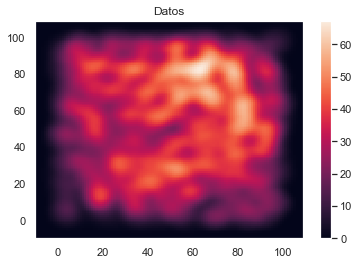

In [577]:
# https://www.geodose.com/2018/01/creating-heatmap-in-python-from-scratch.html
import math

#POINT DATASET
x=df[0]
y=df[1]

#DEFINE GRID SIZE AND RADIUS(h)
grid_size=1
h=10

#GETTING X,Y MIN AND MAX
x_min=min(x)
x_max=max(x)
y_min=min(y)
y_max=max(y)

#CONSTRUCT GRID
x_grid=np.arange(x_min-h,x_max+h,grid_size)
y_grid=np.arange(y_min-h,y_max+h,grid_size)
x_mesh,y_mesh=np.meshgrid(x_grid,y_grid)

#GRID CENTER POINT
xc=x_mesh+(grid_size/2)
yc=y_mesh+(grid_size/2)

#FUNCTION TO CALCULATE INTENSITY WITH QUARTIC KERNEL
def kde_quartic(d,h):
    dn=d/h
    P=(15/16)*(1-dn**2)**2
    return P

#PROCESSING
intensity_list=[]
for j in range(len(xc)):
    intensity_row=[]
    for k in range(len(xc[0])):
        kde_value_list=[]
        for i in range(len(x)):
            #CALCULATE DISTANCE
            d=math.sqrt((xc[j][k]-x[i])**2+(yc[j][k]-y[i])**2) 
            if d<=h:
                p=kde_quartic(d,h)
            else:
                p=0
            kde_value_list.append(p)
        #SUM ALL INTENSITY VALUE
        p_total=sum(kde_value_list)
        intensity_row.append(p_total)
    intensity_list.append(intensity_row)

#HEATMAP OUTPUT    
intensity=np.array(intensity_list)
plt.pcolormesh(x_mesh,y_mesh,intensity)
#plt.plot(x,y,'ro', color='b')
plt.title('Datos')
plt.colorbar()
plt.show()

<ipython-input-503-18a858a323a2>:51: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_mesh,y_mesh,intensity)


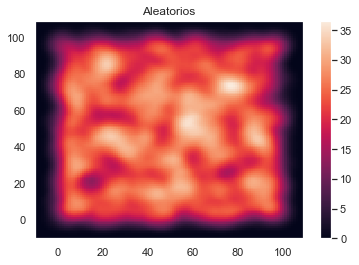

In [503]:
#POINT DATASET
x=rr.T[0]
y=rr.T[1]

#DEFINE GRID SIZE AND RADIUS(h)
grid_size=1
h=10

#GETTING X,Y MIN AND MAX
x_min=min(x)
x_max=max(x)
y_min=min(y)
y_max=max(y)

#CONSTRUCT GRID
x_grid=np.arange(x_min-h,x_max+h,grid_size)
y_grid=np.arange(y_min-h,y_max+h,grid_size)
x_mesh,y_mesh=np.meshgrid(x_grid,y_grid)

#GRID CENTER POINT
xc=x_mesh+(grid_size/2)
yc=y_mesh+(grid_size/2)

#FUNCTION TO CALCULATE INTENSITY WITH QUARTIC KERNEL
def kde_quartic(d,h):
    dn=d/h
    P=(15/16)*(1-dn**2)**2
    return P

#PROCESSING
intensity_list=[]
for j in range(len(xc)):
    intensity_row=[]
    for k in range(len(xc[0])):
        kde_value_list=[]
        for i in range(len(x)):
            #CALCULATE DISTANCE
            d=math.sqrt((xc[j][k]-x[i])**2+(yc[j][k]-y[i])**2) 
            if d<=h:
                p=kde_quartic(d,h)
            else:
                p=0
            kde_value_list.append(p)
        #SUM ALL INTENSITY VALUE
        p_total=sum(kde_value_list)
        intensity_row.append(p_total)
    intensity_list.append(intensity_row)

#HEATMAP OUTPUT    
intensity=np.array(intensity_list)
plt.pcolormesh(x_mesh,y_mesh,intensity)
#plt.plot(x,y,'ro', color='b')
plt.title('Aleatorios')
plt.colorbar()
plt.show()

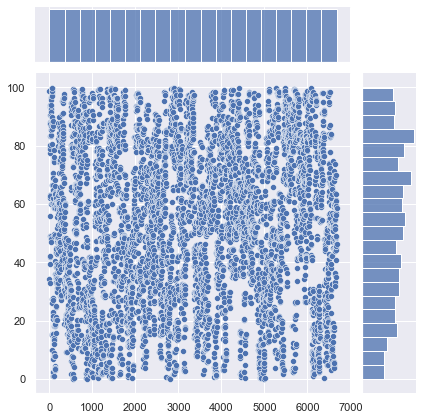

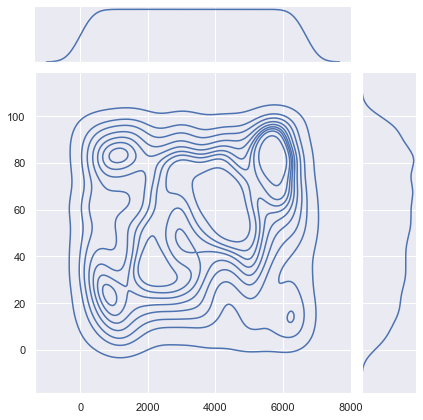

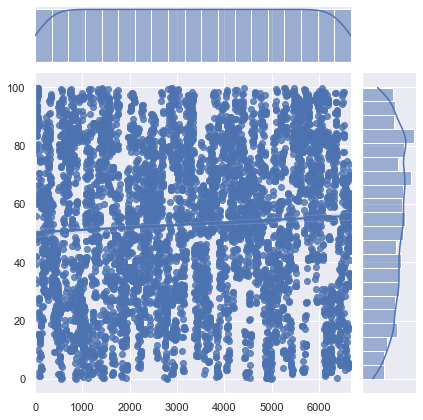

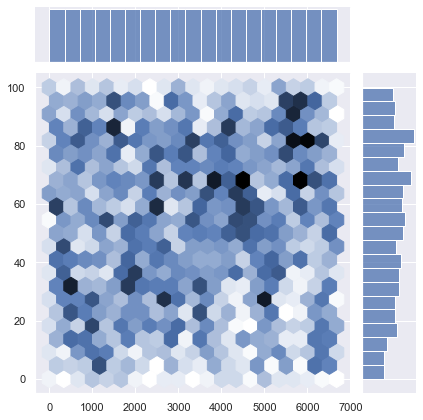

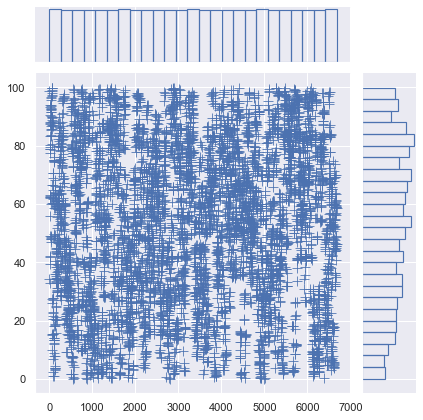

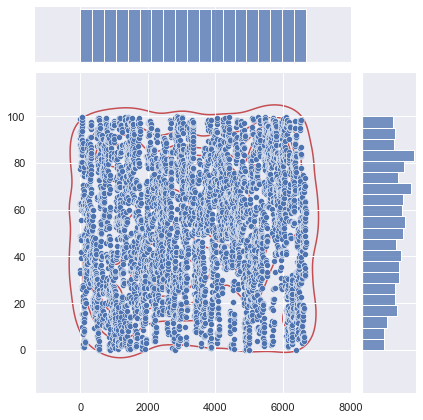

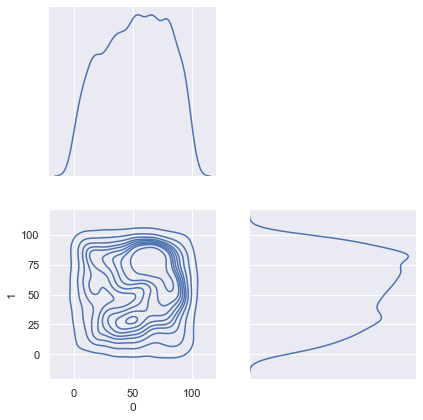

In [579]:
sns.jointplot(data=DD(circulos))
sns.jointplot(data=DD(circulos), kind="kde")
sns.jointplot(data=DD(circulos), kind="reg")
#sns.jointplot(data=DD(circulos), kind="hist")
sns.jointplot(data=DD(circulos), kind="hex")
sns.jointplot(data=DD(circulos), marker="+", s=100, marginal_kws=dict(bins=25, fill=False))
g = sns.jointplot(data=DD(circulos))
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
#g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)
sns.jointplot(x=df[0], y=df[1], kind='kde',ratio=1)

In [ ]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(20,10), nrows=1, ncols=2)
plt.tight_layout()

axes_cosmo[0].
axes_cosmo[1].
axes_cosmo[1].

sns.jointplot(data=DD(circulos))
sns.jointplot(data=DD(circulos), kind="kde")
sns.jointplot(data=DD(circulos), kind="reg")
#sns.jointplot(data=DD(circulos), kind="hist")
sns.jointplot(data=DD(circulos), kind="hex")
sns.jointplot(data=DD(circulos), marker="+", s=100, marginal_kws=dict(bins=25, fill=False))
g = sns.jointplot(data=DD(circulos))
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
#g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)
sns.jointplot(x=df[0], y=df[1], kind='kde',ratio=1)

In [12]:
colors = []
fig = plt.figure(figsize=(10,10))
  
def animation_func(i):
    colors.append(np.random.rand(1))
    plt.xlim(0,100)
    plt.ylim(0,100)
    plt.scatter(*zip(*circulo[i]))
  
animation = FuncAnimation(fig, animation_func, interval = 100)
#animation.save('circles.gif', writer='imagemagick', fps=3.0)

<Figure size 720x720 with 0 Axes>

In [13]:
fig = plt.figure(figsize=(10,10))
  
def animation_func(i):
    colors.append(np.random.rand(1))
    plt.xlim(0,100)
    plt.ylim(0,100)
    plt.scatter(*zip(*circulo[i]), color='b')
  
animation = FuncAnimation(fig, animation_func, interval = 100)
#animation.save('circlessamecolor.gif', writer='imagemagick')

<Figure size 720x720 with 0 Axes>

# Distancia
Para los siguientes calculos usamos la siguiente función para calcular distancias entre dos puntos:
$$d(\bar{x},\bar{y})=\sqrt{(x_1-x_2)^2+(y_1-y_2)^2}$$

In [419]:
#Creamos una función que nos de las distancias entre dos puntos
def distancia(x1, x2):
    diff_x = (x1[0] - x2[0])**2
    diff_y = (x1[1] - x2[1])**2
    length = np.sqrt(diff_x+diff_y)
    return length

A continuación programamos una función que calcula las distancias entre todos los puntos, sin repetir.

In [420]:
#Checar como funciona
def comp_all_distances(sample):
    dist_random = []
    for i, _ in enumerate(sample):
        g = partial(distancia, sample[i]) #partial() recibe una función A con sus respectivos argumentos y retorna una nueva función B que, al ser llamada, equivale a llamar a la función A con los argumentos provistos.
        d = list(map(g, sample[i+1:]))  # Declaración de una lista
        #La función map() toma una función y una lista y aplica esa función a cada elemento de esa lista, produciendo una nueva lista. 
        dist_random.extend(d)
    return dist_random

A continuación, calculamos todas las ditancias de los puntos aleatorios (RR) y posteriormente de los DD

In [421]:
distance_rr = comp_all_distances(rr)

In [422]:
distance_dd = comp_all_distances(DD(circulo))

In [423]:
len(distance_rr)

3136260

## Histogramas
A continuación, en la primer gráfica, utilizamos **density=True**, normaliza las alturas de los contenedores de modo que la integral del histograma es 1. El histograma resultante es una aproximación de la función de densidad de probabilidad.

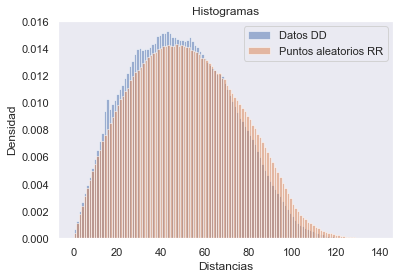

In [424]:
plt.figure()
plt.hist(distance_dd, bins=120, alpha=0.5, label='Datos DD', density=True)
plt.hist(distance_rr, bins=120, alpha=0.5, label='Puntos aleatorios RR', density=True)
plt.xlabel('Distancias')
plt.ylabel('Densidad')
plt.title('Histogramas')
plt.grid()
plt.legend()
plt.show()

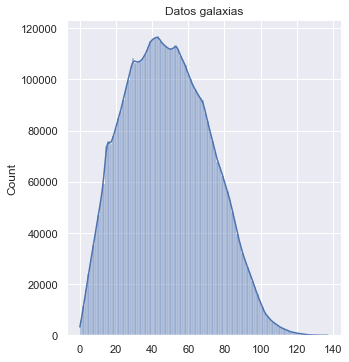

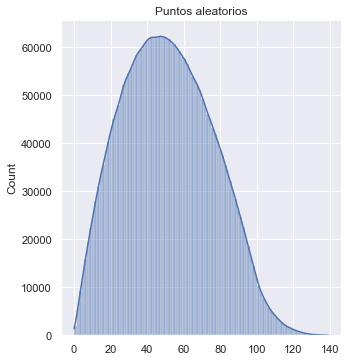

In [425]:
sns.displot(distance_dd, bins=100, kde=True).set(title='Datos galaxias');
sns.displot(distance_rr, bins=100, kde=True).set(title='Puntos aleatorios');

In [581]:
# Ordena los elementos de un iterable dado en un orden específico (ascendente o descendente) y lo devuelve como una lista
sorted_DD = sorted(distance_dd)
sorted_RR= sorted(distance_rr)

In [582]:
rrandom = [round(r, 0) for r in  distance_rr] #round redonde a 0 decimales
rcount = Counter(rrandom) #registra cuántas veces se agregan valores equivalentes.
sorted_RR = sorted(rcount.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

In [583]:
ddata = [round(r, 0) for r in  distance_dd]
dcount = Counter(ddata)
sorted_DD = sorted(dcount.items())

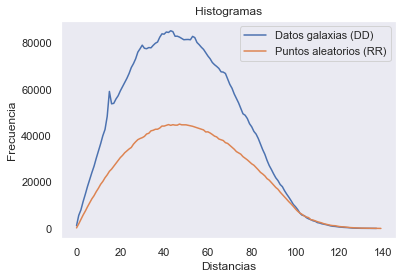

In [584]:
xDD = [x[0] for x in sorted_DD] #Distancias para DD
yDD = [x[1] for x in sorted_DD] # Cantidad de veces que se reppite cada distancia al cuadrado
xRR = [x[0] for x in sorted_RR] #Distancias para RR
yRR = [x[1] for x in sorted_RR] # Cantidad de veces que se reppite cada distancia al cuadrado
plt.plot(xDD, yDD, label='Datos galaxias (DD)')
plt.plot(xRR, yRR, label='Puntos aleatorios (RR)')
plt.xlabel('Distancias')
plt.ylabel('Frecuencia')
plt.title('Histogramas')
plt.grid()
plt.legend()

In [585]:
s = []
for i in range(140):
    s.append((dcount[i] - rcount[i]))

Ahora, la forma más sencilla de estimar la función de correlación de dos puntos $\xi(r)$ :
$$\xi(r)=\frac{\hat{DD}}{\hat{RR}}-1 $$
donde DD es la distribución de distancias de pares de galaxias dentro de un conjunto de datos, y RR la distribución de distancias de un conjunto aleatorio. Si $\xi(r)=0$ la distribución de galaxias en los datos también es aleatoria; $\xi(r)>0$ existe una sobredensidad y, contrariamente, para $\xi(r)<0$ una infradensidad.
Peebles-Hauser: Propuesto en 1974, este compara el exceso de pares de puntos
en un rango de distancia entre el campo objetivo y el campo de comparación. Se
define como:
$$ξ_{PH} (r) = \left(\frac{N_r}{N}\right)^2\frac{DD(r)}{RR(r)}− 1$$

Text(0.5, 1.0, 'DD(r) - RR(r)')

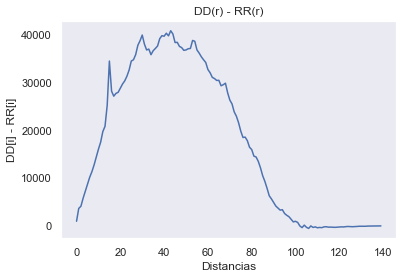

In [586]:
plt.plot(s)
plt.grid()
plt.xlabel('Distancias')
plt.ylabel('DD[i] - RR[i]')
plt.title('DD(r) - RR(r)')

In [587]:
all_data = DD(circulo)
all_data.extend(rr)

In [588]:
distance_all = comp_all_distances(all_data)

In [589]:
# Ordena los elementos de un iterable dado en un orden específico (ascendente o descendente) y lo devuelve como una lista
sorted_all = sorted(distance_all)
allrandom = [round(r, 0) for r in  distance_all] #round redonde a 0 decimales
allcount = Counter(allrandom) #registra cuántas veces se agregan valores equivalentes.
sorted_all = sorted(allcount.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

Dentro de la muestra de datos, dd(r) que se pueden normalizar por el número total de pares como
$$DD(r)=\frac{dd(r)}{n_d(n_d-1)/2}$$
dentro de la muestra aleatoria, lo que lleva a rr(r) normalizado
como
$$RR(r)=\frac{rr(r)}{n_r(n_r-1)/2}$$
entre ambas muestras (correlación cruzada) que conduce a dr(r)
normalizado como
$$DR(r)=\frac{dr(r)}{n_rn_d}$$

In [590]:
DD= []
for i in range(130):
    DD.append(dcount[i]/((N*(N-1))/2))

In [591]:
RR= []
for i in range(130):
    RR.append(rcount[i]/((Nr*(Nr-1))/2))

In [592]:
DR= []
for i in range(130):
    DR.append(allcount[i]/(Nr*N)) 

## Función de correlación
- Peebles-Hauser: Propuesto en 1974, este compara el exceso de pares de puntos en un rango de distancia entre el campo objetivo y el campo de comparación. Se define como:
$$\xi_{PH} (r) = \frac{DD(r)}{RR(r)}- 1$$

In [613]:
ξ_PH = []
for i in range(130):
    ξ_PH.append(((DD[i]/RR[i]) -1))

- Davis-Peebles: También conocido como estimador estándar, es propuesto en 1983 por los autores que le dan su nombre, presentando menor sesgo y mejorando la corrección el efecto de borde, el cual se genera cuando se cuentan pares de puntos cerca al borde de la ventana pues naturalmente se subestima el resultado. Esté estimador se define como:
$$\xi_{DP} (r) = \frac{DD(r)}{DR(r)}- 1$$

In [614]:
ξ_DP = []
for i in range(130):
    ξ_DP.append(((DD[i]/DR[i]) -1))

- Hamilton: Aunque sigue siendo un estimador sesgado, la magnitud de este es menor al de los estimadores mencionados.
$$\xi_{H} (r) = \frac{DD(r)\times RR(r)}{[DR(r)]^2}- 1$$

In [615]:
ξ_H = []
for i in range(130):
    ξ_H.append((((DD[i]*RR[i])/((DR[i])**2)) -1))

- Landy-Szalay: Al igual que el estimador de Hamilton, fue propuesto en 1993 y presentando un sesgo menor al de los dos primeros estimadores.
$$\xi_{LS} (r) = \frac{DD(r)-2DR(r)+RR(r)}{RR(r)}$$

In [616]:
ξ_LS = []
for i in range(130):
    ξ_LS.append(((DD[i]-(2*DR[i])+RR[i])/RR[i]))

- Hewet
$$\xi_{He} (r) = \frac{DD(r)-DR(r)}{RR(r)}$$

In [617]:
ξ_He = []
for i in range(130):
    ξ_He.append(((DD[i]-DR[i])/RR[i]))

Text(0.5, 1.0, 'Función de correlación C(r)')

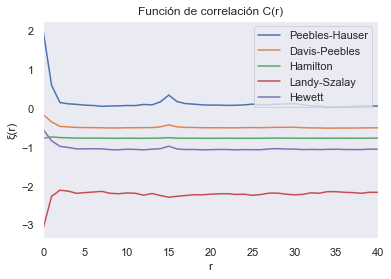

In [619]:
plt.plot(ξ_PH, label='Peebles-Hauser')
plt.plot(ξ_DP, label='Davis-Peebles')
plt.plot(ξ_H, label='Hamilton')
plt.plot(ξ_LS, label='Landy-Szalay')
plt.plot(ξ_He, label='Hewett')
plt.grid()
plt.legend()
plt.xlabel('r')
plt.xlim(0,40)
plt.ylabel('ξ(r)')
plt.title('Función de correlación C(r)')

In [620]:
ξ_PH_r2 = []
for i in range(130):
    ξ_PH_r2.append( (i**2)*ξ_PH[i] )

Text(0.5, 1.0, 'Función de correlación ξ(r)')

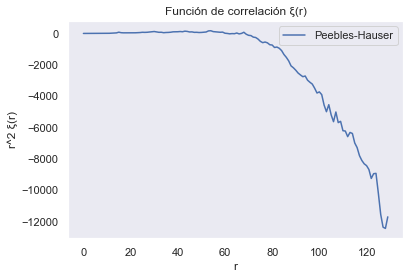

In [622]:
plt.plot(ξ_PH_r2, label='Peebles-Hauser')
plt.grid()
plt.legend()
plt.xlabel('r')
#plt.xlim(0,40)
plt.ylabel('r^2 ξ(r)')
plt.title('Función de correlación ξ(r)')

## Data clustering for circle detection

In [444]:
np.random.seed(421) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos 312
circulo_train = Puntos_circulos(1, 100, 15, 100,0.01)

total puntos 130


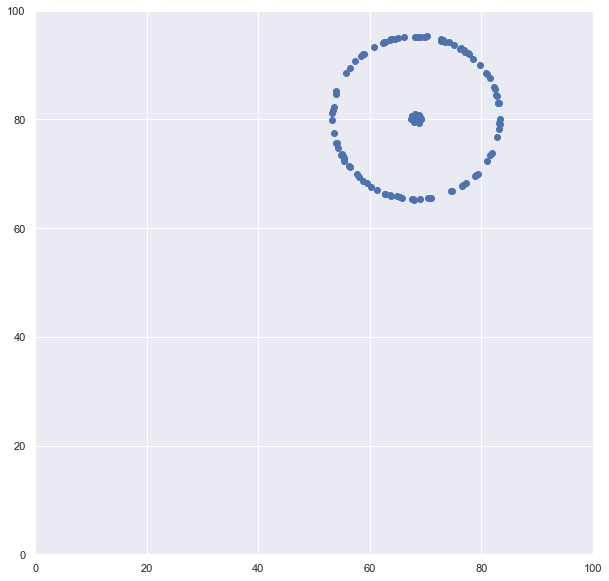

In [445]:
plt.figure(figsize=(10,10))
plt.xlim(0, 100)
plt.ylim(0, 100)

#graficar todos
for cir in circulo_train: 
    plt.scatter(*zip(*cir), color='b')

In [448]:
circulos_train = DD(circulo_train)

In [449]:
x_train = np.zeros((len(circulos_train), 1))
y_train = np.zeros((len(circulos_train), 1))
for i in range(len(circulos_train)):
    x_train[i] = circulos_train[i][0]
    y_train[i] = circulos_train[i][1]

In [450]:
#Importampos los datos
datos_train = np.zeros((len(circulos_train),2))
for i in range(len(circulos_train)):
        datos_train[i,0] = circulos_train[i][0]
        datos_train[i,1] = circulos_train[i][1]

center of fitted circle = (68.26043053282808, 80.5230420040505) 
 radius = 13.108988239315671 +/- stddev= 0.48652189766961085


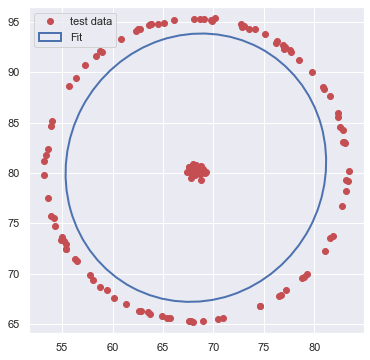

In [451]:
#pip install lsq-ellipse 
from ellipse import LsqEllipse
import statistics
from statistics import mean 
from matplotlib.patches import Ellipse

lsqe = LsqEllipse()
lsqe.fit(datos_train)
center, width, height, phi = lsqe.as_parameters()

plt.close('all')
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.axis('equal')
ax.plot(datos_train[:,0], datos_train[:,1], 'ro', label='test data', zorder=1)

ellipse = Ellipse(xy=center, width=2*width, height=2*height, angle=np.rad2deg(phi),
              edgecolor='b', fc='None', lw=2, label='Fit', zorder = 2)
ax.add_patch(ellipse)
print('center of fitted circle =',center, '\n','radius =', mean([width,height]),'+/- stddev=',statistics.stdev([width,height]))
plt.legend()
plt.show()

Los puntos se agrupan alrededor de círculos de modo que la suma de las distancias desde los puntos de datos y los círculos más cercanos apropiados se minimiza.

Sea R2 el conjunto de todos los puntos del plano y R+ el conjunto de los números reales no negativos.



# Clustering
## DBSCAN
Density-Based Spatial Clustering of Applications with Noise

- Si no hay densidad, entonces es ruido

class sklearn.cluster.DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)

"El algoritmo DBSCAN funciona con dos parámetros.

Estos parámetros son:

- Epsilon (Eps): Esta es la distancia mínima requerida para que dos puntos sean denominados como vecinos, es decir, si la distancia entre dos puntos es máxima Eps, entonces consideramos que los dos puntos son vecinos.

- MinPoints: Esto se refiere al número mínimo de puntos necesarios para construir un clúster. Un clúster solo se reconoce si el número de puntos es mayor o igual que los MinPts.

Tipos de puntos de datos en un clúster de DBSCAN
Una vez que se completa la agrupación en clústeres de DBSCAN, terminamos con tres tipos de puntos de datos de la siguiente manera:

- Núcleo: Este es un punto a partir del cual los dos parámetros anteriores están completamente definidos, es decir, un punto con al menos Minpoints dentro de la distancia de Eps de sí mismo.
- Frontera: Este es cualquier punto de datos que no es un punto central, pero tiene al menos un punto central dentro de la distancia Eps de sí mismo.
- Ruido: Este es un punto con menos de Minpoints a distancia Eps de sí mismo. Por lo tanto, no es un núcleo o una frontera." -https://www.section.io/engineering-education/dbscan-clustering-in-python/#:~:text=DBSCAN%20is%20a%20popular%20density,number%20of%20clusters%20required%20prior.

In [46]:
#pip install circle-fit



  Created wheel for circle-fit: filename=circle_fit-0.1.3-py3-none-any.whl size=3488 sha256=285236a2cfb2aa2026881c517458d785a16acc07b59aae05453f365a6227862f
  Stored in directory: c:\users\sammy\appdata\local\pip\cache\wheels\17\79\7f\11a381cd10ef225dabf73c87d225c35ad38f1fa658ce444d68
Successfully built circle-fit
Note: you may need to restart the kernel to use updated packages.


In [452]:
from sklearn.cluster import DBSCAN

In [453]:
circulos = DD(circulo)

In [454]:
x_test = np.zeros((len(circulos), 1))
y_test = np.zeros((len(circulos), 1))
for i in range(len(circulos)):
    x_test[i] = circulos[i][0]
    y_test[i] = circulos[i][1]

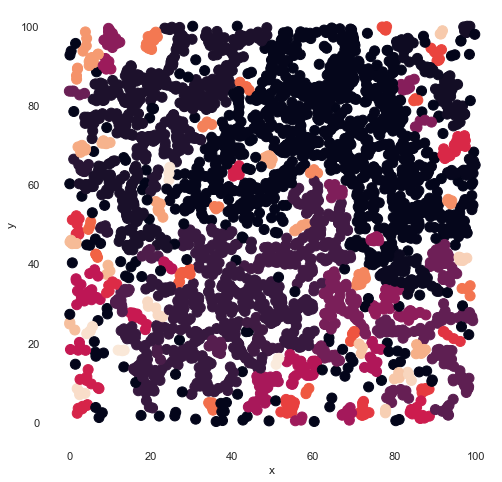

In [457]:
#Importampos los datos
datos = np.zeros((len(circulos),2))
for i in range(len(circulos)):
        datos[i,0] = circulos[i][0]
        datos[i,1] = circulos[i][1]
#identificar Clusters
clusters = DBSCAN(eps=2, min_samples=3).fit_predict(datos)


#Gráfica de matplotlib para mostrar los Clusters 
plt.figure(figsize=(8,8))
plt.scatter(datos[:,0], datos[:,1], c=clusters, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.box(False)
plt.show()

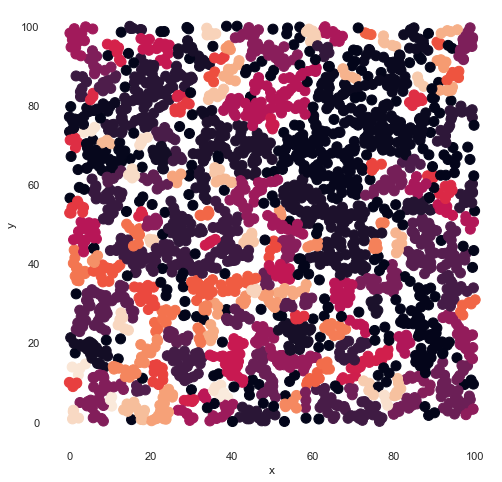

In [458]:
#Importampos los datos
datosrr = np.zeros((len(rr),2))
for i in range(len(rr)):
        datosrr[i,0] = rr[i][0]
        datosrr[i,1] = rr[i][1]
        
#identificar Clusters
clusters = DBSCAN(eps=2, min_samples=3).fit_predict(datosrr)

#Gráfica de matplotlib para mostrar los Clusters 
plt.figure(figsize=(8,8))
plt.scatter(datosrr[:,0], datosrr[:,1], c=clusters, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.box(False)
plt.show()

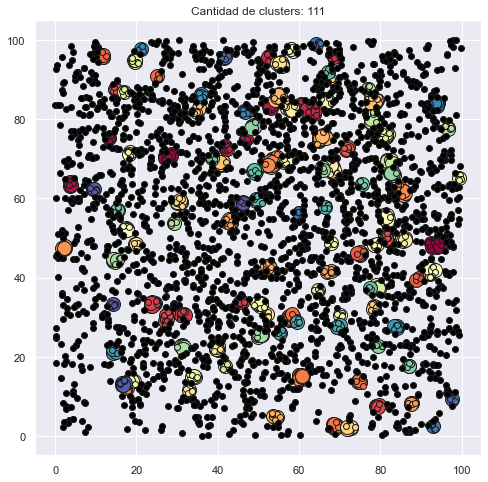

In [509]:
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# DBSCAN
db = DBSCAN(eps=1, min_samples=6).fit(datos) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = datos[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Cantidad de clusters: %d' % n_clusters_)
plt.show()

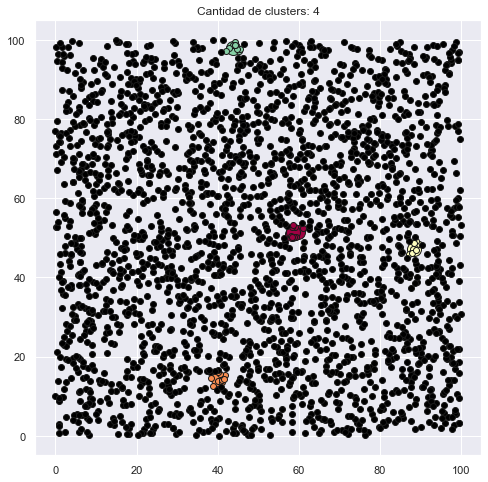

In [483]:
# DBSCAN
db = DBSCAN(eps=2, min_samples=10).fit(datosrr)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Plot 
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datosrr[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = datosrr[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Cantidad de clusters: %d' % n_clusters_)
plt.show()

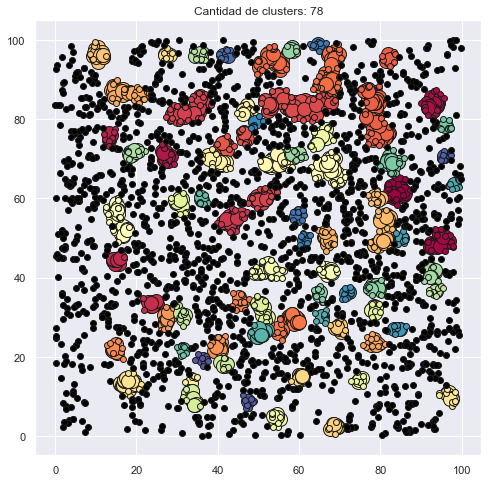

In [482]:
# DBSCAN
db = DBSCAN(eps=2, min_samples=10).fit(datos) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = datos[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Cantidad de clusters: %d' % n_clusters_)
plt.show()

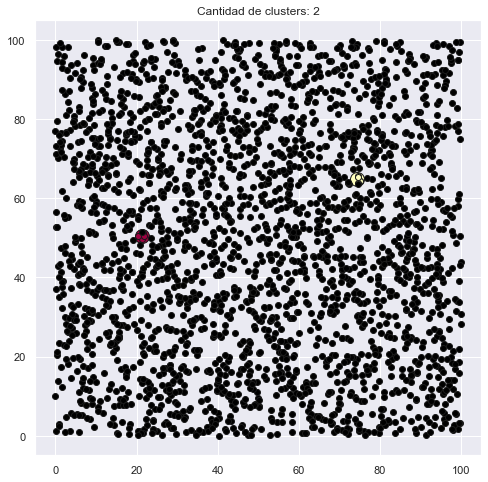

In [397]:
# DBSCAN
db = DBSCAN(eps=1, min_samples=6).fit(datosrr)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Plot 
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datosrr[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = datosrr[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Cantidad de clusters: %d' % n_clusters_)
plt.show()

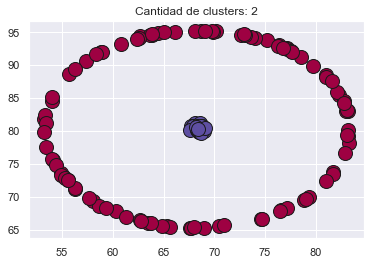

In [404]:
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# DBSCAN
db = DBSCAN(eps=5, min_samples=5).fit(datos_train)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_train[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = datos_train[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Cantidad de clusters: %d' % n_clusters_)
plt.show()

## Fuzzy c means

### from fcmeans import FCM
from sklearn.datasets import make_blobs
from seaborn import scatterplot as scatter

#fit the fuzzy-c-means
fcm = FCM(n_clusters=105)
fcm.fit(datos)

#Resultados
#Centroides 
fcm_centers = fcm.centers
#Matriz de pesos (sacaremos el máximo, sería tipo k-means)
fcm_labels_max = fcm.u.argmax(axis=1)
#La matriz tiene tamño Nelementos x Ncentros
print(fcm.u.shape)
print(fcm.u[0])
print(fcm_labels_max)

#Aquí la clase que menos se parecen
fcm_labels_min = fcm.u.argmin(axis=1)

In [390]:
from fcmeans import FCM
from sklearn.datasets import make_blobs
from seaborn import scatterplot as scatter

(3355, 100)
[0.00455089 0.0061831  0.00592995 0.00240441 0.00172989 0.00142288
 0.00412419 0.00266322 0.00271898 0.00152783 0.00295775 0.00513147
 0.00370414 0.02952364 0.00403152 0.00619895 0.00481694 0.0035221
 0.00233026 0.00234754 0.00812756 0.00622438 0.00423058 0.00391123
 0.01580762 0.00570711 0.00197518 0.00219141 0.00156396 0.05124032
 0.003837   0.00993367 0.00936825 0.00123451 0.00155897 0.00160894
 0.00310427 0.02919465 0.00201132 0.00319983 0.00096851 0.00153485
 0.00159116 0.0024872  0.00464319 0.0025246  0.00337742 0.00234024
 0.00326741 0.00208617 0.00135067 0.0032142  0.0062577  0.00096769
 0.00708307 0.00341601 0.00229656 0.04533505 0.00203413 0.00254598
 0.0025117  0.00553448 0.00986084 0.00322043 0.0020788  0.01275214
 0.00697186 0.00160938 0.00242003 0.00492865 0.00125525 0.00325436
 0.02808115 0.00446098 0.00732902 0.02327916 0.00377913 0.00150627
 0.0057207  0.01557687 0.00244094 0.00171465 0.00288559 0.00159566
 0.08567855 0.00400871 0.00348878 0.01065265 0.0011

C:\Users\sammy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sammy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'fcm_labels_min' is not defined

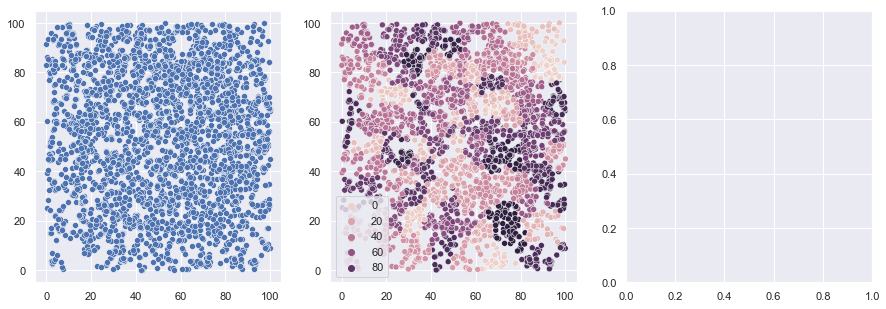

In [391]:
#fit the fuzzy-c-means
fcm = FCM(n_clusters=100)
fcm.fit(datos)

#Resultados
#Centroides 
fcm_centers = fcm.centers
#Matriz de pesos (sacaremos el máximo, sería tipo k-means)
fcm_labels_max = fcm.u.argmax(axis=1)
#La matriz tiene tamño Nelementos x Ncentros
print(fcm.u.shape)
print(fcm.u[0])
print(fcm_labels_max)

#Aquí la clase que menos se parecen
fcmr_labels_min = fcm.u.argmin(axis=1)

#Plot
f, axes = plt.subplots(1, 3, figsize=(15,5))
scatter(datos[:,0], datos[:,1], ax=axes[0])
scatter(datos[:,0], datos[:,1], ax=axes[1], hue=fcm_labels_max)
scatter(datos[:,0], datos[:,1], ax=axes[2], hue=fcm_labels_min)
scatter(fcm_centers[:,0], fcm_centers[:,1], ax=axes[1], marker="s", s=100)

(2775, 100)
[0.01162918 0.0010527  0.00240031 0.0013893  0.00223997 0.00285406
 0.00197341 0.00948699 0.00418029 0.01426916 0.00123287 0.00354198
 0.00164649 0.00157855 0.00364616 0.00134176 0.00156859 0.00518612
 0.01367698 0.01266118 0.00108174 0.00498713 0.03965814 0.00515599
 0.00815809 0.1245571  0.00302129 0.00464519 0.00288056 0.00099264
 0.00170048 0.00114297 0.06273227 0.00275366 0.00313023 0.00228967
 0.00233958 0.00096964 0.00423955 0.00105688 0.00579616 0.00188231
 0.00067307 0.00569204 0.01280431 0.01364558 0.00232517 0.00248468
 0.00242084 0.0016016  0.00368072 0.0011268  0.00174794 0.00193711
 0.0018765  0.00146525 0.00084191 0.01793569 0.01684644 0.00121515
 0.0014116  0.00297116 0.00087282 0.03882356 0.00297557 0.00078258
 0.00959687 0.00184909 0.00172003 0.00345566 0.00261124 0.00532337
 0.0237011  0.00392586 0.00430376 0.00527295 0.00345613 0.00697959
 0.02152567 0.00093854 0.072168   0.00559083 0.01376944 0.00830171
 0.0018262  0.12912789 0.00144463 0.0019662  0.001

C:\Users\sammy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sammy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sammy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sammy\Anacond

<AxesSubplot:>

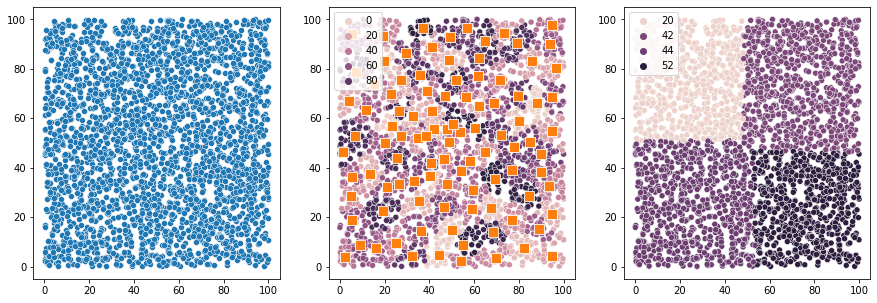

In [135]:
#fit the fuzzy-c-means
fcmr = FCM(n_clusters=100)
fcmr.fit(datosrr)

#Resultados
#Centroides 
fcmr_centers = fcmr.centers
#Matriz de pesos (sacaremos el máximo, sería tipo k-means)
fcmr_labels_max = fcmr.u.argmax(axis=1)
#La matriz tiene tamño Nelementos x Ncentros
print(fcmr.u.shape)
print(fcmr.u[0])
print(fcmr_labels_max)

#Aquí la clase que menos se parecen
fcmr_labels_min = fcmr.u.argmin(axis=1)

#Plot
f, axes = plt.subplots(1, 3, figsize=(15,5))
scatter(datosrr[:,0], datosrr[:,1], ax=axes[0])
scatter(datosrr[:,0], datosrr[:,1], ax=axes[1], hue=fcmr_labels_max)
scatter(datosrr[:,0], datosrr[:,1], ax=axes[2], hue=fcm_labels_min)
scatter(fcmr_centers[:,0], fcmr_centers[:,1], ax=axes[1], marker="s", s=100)